## CE9010: Introduction to Data Science
## Semester 2 2017/18
## Xavier Bresson
<hr>

## Tutorial 6: Bias vs. variance
## Objectives
### $\bullet$ Plot loss/error w.r.t. learning capacity, regularization and training size
### $\bullet$ Explore results
<hr>

In [1]:
# Import libraries

# math library
import numpy as np

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# scikit-learn library
from sklearn.preprocessing import PolynomialFeatures

# scientific computing library
from scipy.optimize import minimize

# remove warning
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

# computational time
import time


In [2]:
# Definitions of all functions


# sigmoid function
def sigmoid(z):
    sigmoid_f = 1 / (1 + np.exp(-z)) 
    return sigmoid_f 


# predictive function definition
def f_pred(X,w): 
    p = sigmoid(X.dot(w)) 
    return p


# loss function definition
def loss_logreg(w,X,y,reg): 
    n = len(y)
    y_pred = sigmoid(X.dot(w)) 
    loss = -1/n* ( y.T.dot(np.log(y_pred+1e-10)) + (1-y).T.dot(np.log(1-y_pred+1e-10)) ) 
    d = w.shape[0]
    loss += reg/d * w.T.dot(w)
    return loss


def plot_classes(data,title,cpt_fig):
    
    # plot
    x1 = data[:,0] # feature 1
    x2 = data[:,1] # feature 2
    idx_class0 = (data[:,2]==0) # index of class0
    idx_class1 = (data[:,2]==1) # index of class1

    plt.figure(cpt_fig,figsize=(6,6))
    plt.scatter(x1[idx_class0], x2[idx_class0], s=60, c='r', marker='+', label='Class0') 
    plt.scatter(x1[idx_class1], x2[idx_class1], s=30, c='b', marker='o', label='Class1')
    plt.title(title)
    plt.legend()
    plt.show()
    
    
def compute_w_solution(X,y,reg):
    initial_w = np.zeros((X.shape[1],1))
    result = minimize(loss_logreg, initial_w, args=(X,y,reg), method='Powell', options={'maxiter':500})
    w_solution = np.array(result.x)[:,None]
    loss_solution = loss_logreg(w_solution,X,y,reg)
    return w_solution, loss_solution
    
    
def plot_decision_boundary(X,w,data,title,cpt_fig):

    # compute values p(x) for multiple data points x
    x1_min, x1_max = X[:,1].min(), X[:,1].max() # min and max of grade 1
    x2_min, x2_max = X[:,2].min(), X[:,2].max() # min and max of grade 2
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) # create meshgrid

    n_mesh = xx1.reshape(-1).shape[0]
    mesh_data = np.zeros((n_mesh,2))
    mesh_data[:,0] = xx1.reshape(-1)
    mesh_data[:,1] = xx2.reshape(-1)
    mesh_X = poly.fit_transform(mesh_data)

    p = f_pred(mesh_X,w)
    p = p.reshape(xx1.shape)

    # plot
    x1 = data[:,0] # feature 1
    x2 = data[:,1] # feature 2
    idx_class0 = (data[:,2]==0) # index of class0
    idx_class1 = (data[:,2]==1) # index of class1
    plt.figure(cpt_fig,figsize=(6,6))
    plt.scatter(x1[idx_class0], x2[idx_class0], s=60, c='r', marker='+', label='Class0') 
    plt.scatter(x1[idx_class1], x2[idx_class1], s=30, c='b', marker='o', label='Class1')
    plt.contour(xx1, xx2, p, [0.5], linewidths=2, colors='k') 
    plt.legend()
    plt.title(title)
    plt.show()
    
    
# error
def compute_error(X,w,y):
    
    # continuous predictive function of the classes
    pred = f_pred(X,w)
    
    # discrete predictive function of the classes
    y_pred = (pred >= 0.5).astype('int').squeeze()

    # accuracy
    y = y.squeeze()
    diff = (y_pred == y).astype('int')
    accuracy = 100* sum(diff)/ y.shape[0]
    
    return 100-accuracy
    

## 1. Study of error w.r.t. learning capacity

## 1.1 Load train and val datasets
<hr>
The data features for each data $i$ are $x_i=(x_{i(1)},x_{i(2)})$. <br>
The data label, $y_i$, indicates two classes with value 0 or 1.

Plot the data points.<br>
Hint: You may use `plot_classes` function defined above.

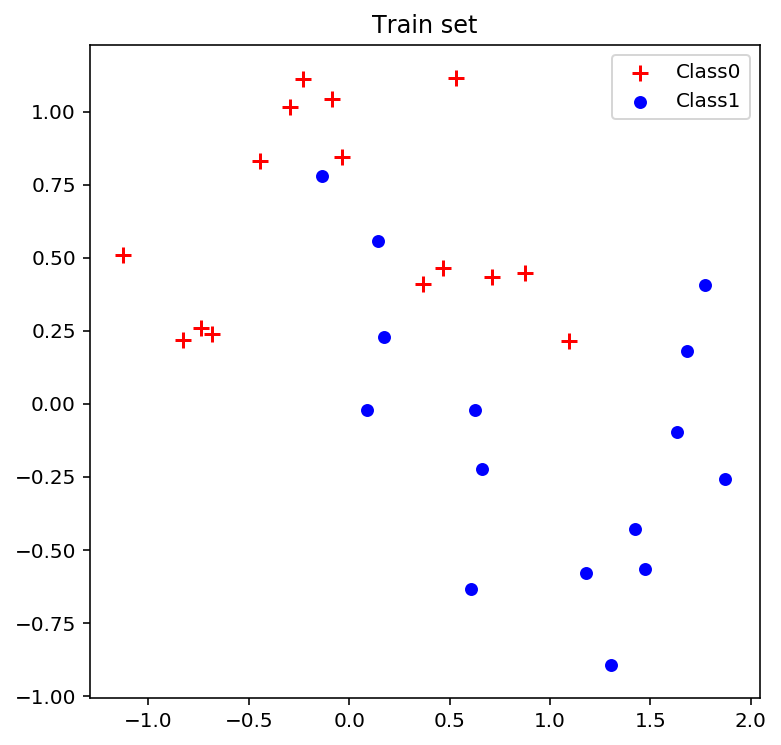

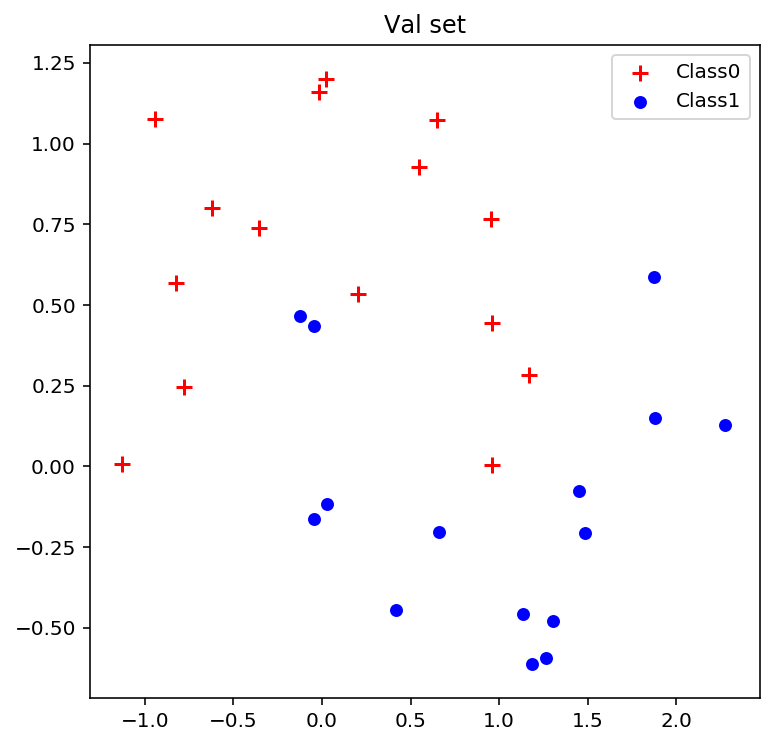

In [3]:
# load
train_data = np.loadtxt('data/two_moons_train_set_d_reg.txt', delimiter=',')
val_data = np.loadtxt('data/two_moons_val_set_d_reg.txt', delimiter=',')

# plot
plot_classes(train_data,'Train set',1)
plot_classes(val_data,'Val set',1)


## 1.2 Compute the accuracy of the train set using a logistic regression function with a polynomial degree d=6.
<hr>

Hints: 

1) You may use the function `PolynomialFeatures` from sklearn library to automatically construct $X$. The function `PolynomialFeatures` generates a matrix consisting of all polynomial combinations of the features with degree less than or equal to $d$. Description of the function is given here:<br>
http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html<br>

Usage example: <br>
$\hspace{1cm}$ `from sklearn.preprocessing import PolynomialFeatures`<br>
$\hspace{1cm}$ `d = 1 # d=polynomial degree, here d=1 for linear features`<br>
$\hspace{1cm}$ `poly = PolynomialFeatures(d)`<br>
$\hspace{1cm}$ `X = poly.fit_transform(data[:,0:2])`<br>


2) You may use the function `compute_w_solution` defined above to find the $w$ solution that optimizes the logistic regression loss.

3) You may use the function `compute_error` defined above to compute the error of the logistic regression function.

4) You should find a very low error.

(30, 66)
train loss= -1.00000008269e-10
train error= 0.0


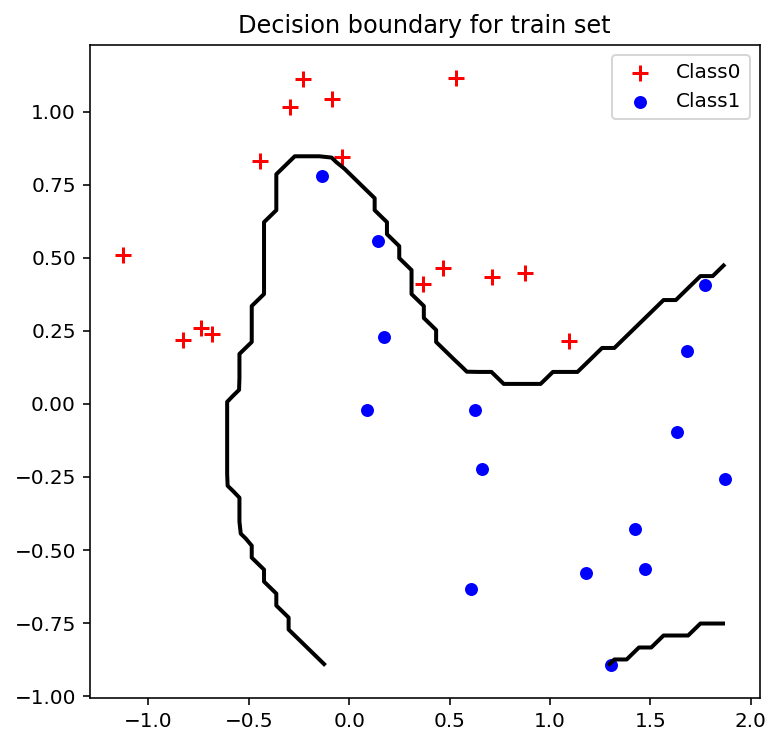

In [4]:
# data features
d = 10
poly = PolynomialFeatures(d)
train_X = poly.fit_transform(train_data[:,0:2])
print(train_X.shape)

# data label
train_y = train_data[:,2][:,None] 

# compute solution w
reg = 0
train_w_solution, train_loss_solution = compute_w_solution(train_X,train_y,reg)
print('train loss=',train_loss_solution[0][0])

# compute accuracy
print('train error=',compute_error(train_X,train_w_solution,train_y))

# plot decision boundary
plot_decision_boundary(train_X,train_w_solution,train_data,'Decision boundary for train set',1)

    

## 1.3 Compute the accuracy of the validation set using the logistic regression function with a polynomial degree d=6 trained on the above training set.
<hr>

Do you think the validation error will be (almost) zero?

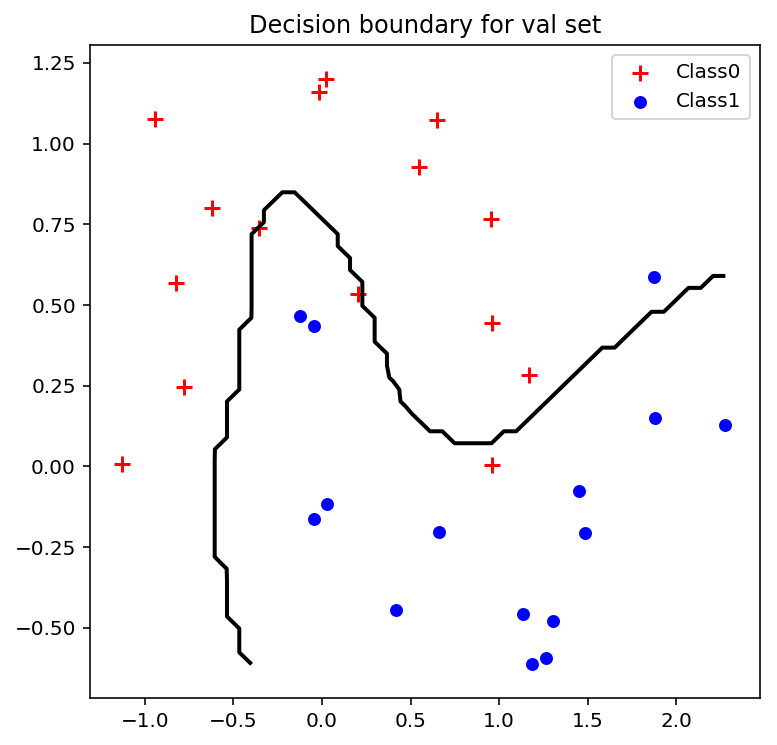

val error= 13.3333333333


In [5]:
val_X = poly.fit_transform(val_data[:,0:2])
val_y = val_data[:,2][:,None]

# compute accuracy
plot_decision_boundary(val_X,train_w_solution,val_data,'Decision boundary for val set',1)

# plot decision boundary
print('val error=',compute_error(val_X,train_w_solution,val_y))


## 1.4 Plot the errors of the train and validation sets w.r.t. learning capacity $d=1,...,9$.
<hr>

Try to understand the shapes of these learning curves. Refer to slide #24 in  *CE9010_lecture07_developing_data_science_projects*.

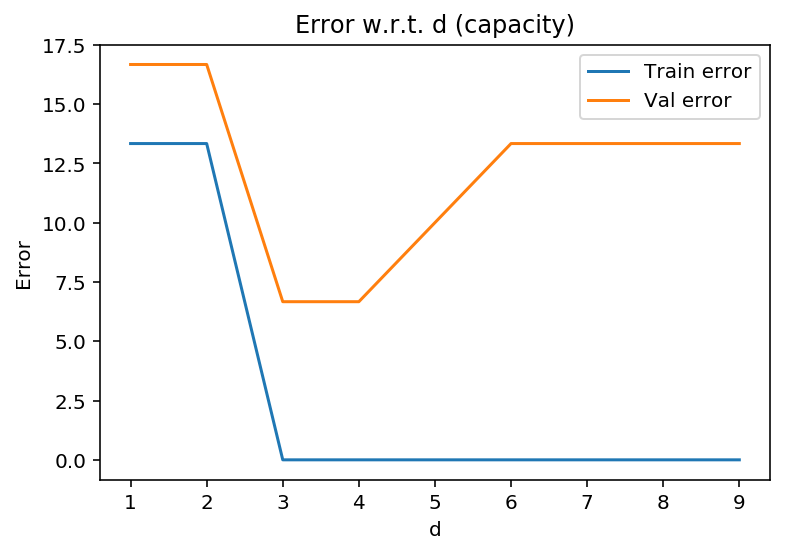

In [6]:
# List of values of the polynomial degree d
list_d = list(range(1,10))

train_error_tab = np.zeros(len(list_d))
val_error_tab = np.zeros(len(list_d))

for i,d in enumerate(list_d):
    
    poly = PolynomialFeatures(d)
    
    train_X = poly.fit_transform(train_data[:,0:2])
    train_w_solution, train_loss_solution = compute_w_solution(train_X,train_y,0)
    train_error = compute_error(train_X,train_w_solution,train_y)
    train_error_tab[i] = train_error
    
    val_X = poly.fit_transform(val_data[:,0:2])
    val_error = compute_error(val_X,train_w_solution,val_y)
    val_error_tab[i] = val_error

    
# plot
x = list_d
plt.figure(1)
plt.plot(x, train_error_tab,label='Train error'.format(i=1))
plt.plot(x, val_error_tab,label='Val error'.format(i=2))
plt.legend(loc='best')
plt.title('Error w.r.t. d (capacity)')
plt.xlabel('d')
plt.ylabel('Error')
plt.show()

## 2. Study of error w.r.t. regularization

## Plot the errors of the train and validation sets w.r.t. regularization parameter $\lambda$=1e-6,1e-5,..,1e3.
<hr>

Try to understand the shapes of these learning curves. Refer to slide #26 in  *CE9010_lecture07_developing_data_science_projects*.

In [7]:
# load
train_data = np.loadtxt('data/two_moons_train_set_d_reg.txt', delimiter=',')
val_data = np.loadtxt('data/two_moons_val_set_d_reg.txt', delimiter=',')

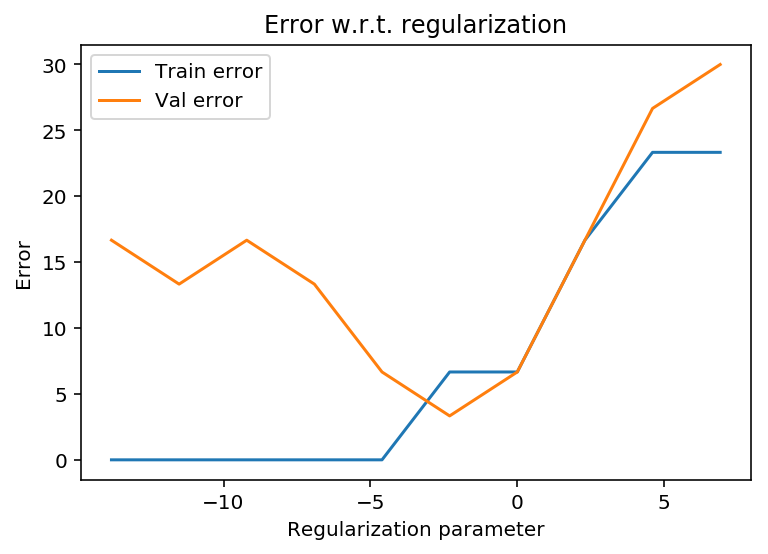

In [8]:
# List of values of the regularization parameter λ
reg = np.array(range(-6,4),np.float32)
reg = 10**reg
list_reg = list(reg)

d = 10
poly = PolynomialFeatures(d)

train_y = train_data[:,2][:,None] 
val_y = val_data[:,2][:,None]

train_error_tab = np.zeros(len(list_reg))
val_error_tab = np.zeros(len(list_reg))

for i,reg in enumerate(list_reg):
    
    train_X = poly.fit_transform(train_data[:,0:2])
    train_w_solution, train_loss_solution = compute_w_solution(train_X,train_y,reg)
    train_error = compute_error(train_X,train_w_solution,train_y)
    train_error_tab[i] = train_error
    
    val_X = poly.fit_transform(val_data[:,0:2])
    val_error = compute_error(val_X,train_w_solution,val_y)
    val_error_tab[i] = val_error

    
# plot
x = np.log(list_reg)
plt.figure(1)
plt.plot(x, train_error_tab,label='Train error'.format(i=1))
plt.plot(x, val_error_tab,label='Val error'.format(i=2))
plt.legend(loc='best')
plt.title('Error w.r.t. regularization')
plt.xlabel('Regularization parameter')
plt.ylabel('Error')
plt.show()


## 3. Study of error w.r.t. regularization

## 3.1 Plot the errors of the train and validation sets w.r.t. the number of training data n=10,30,50,..490  for a low learning capacity d=1.
<hr>

Try to understand the shapes of these learning curves. Refer to slide #27 in  *CE9010_lecture07_developing_data_science_projects*.

In [9]:
# load
train_data = np.loadtxt('data/two_moons_train_set_n.txt', delimiter=',')
val_data = np.loadtxt('data/two_moons_val_set_n.txt', delimiter=',')

train_data_original = train_data
val_data_original = val_data
n_original = train_data_original.shape[0]

[10.0, 30.0, 50.0, 70.0, 90.0, 110.0, 130.0, 150.0, 170.0, 190.0, 210.0, 230.0, 250.0, 270.0, 290.0, 310.0, 330.0, 350.0, 370.0, 390.0, 410.0, 430.0, 450.0, 470.0, 490.0]


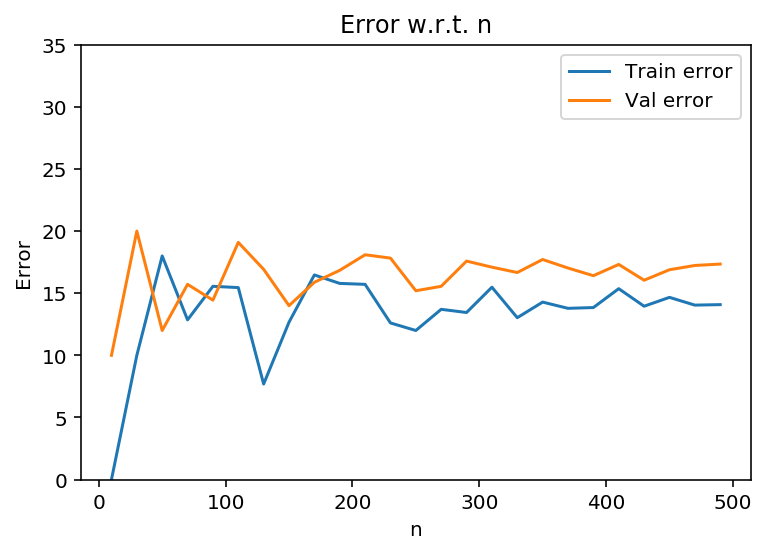

In [10]:
## List of values of n
list_n = list(np.array(range(10,500,20),np.float32))
print(list_n)

d = 1
poly = PolynomialFeatures(d)

train_error_tab = np.zeros(len(list_n))
val_error_tab = np.zeros(len(list_n))

train_y_original = train_data_original[:,2][:,None] 
val_y_original = val_data_original[:,2][:,None]

for i,n in enumerate(list_n):
    
     # select sub-set of n data 
    idx = np.random.permutation(range(n_original))
    idx = idx[:int(n)]
    train_data = train_data_original[idx,:]
    train_y = train_y_original[idx]
    val_data = val_data_original[idx,:]
    val_y = val_y_original[idx]
    
    train_X = poly.fit_transform(train_data[:,0:2])
    train_w_solution, train_loss_solution = compute_w_solution(train_X,train_y,0)
    train_error = compute_error(train_X,train_w_solution,train_y)
    train_error_tab[i] = train_error
    
    val_X = poly.fit_transform(val_data[:,0:2])
    val_error = compute_error(val_X,train_w_solution,val_y)
    val_error_tab[i] = val_error

    
# plot
x = list_n
plt.figure(1)
plt.plot(x, train_error_tab,label='Train error'.format(i=1))
plt.plot(x, val_error_tab,label='Val error'.format(i=2))
plt.legend(loc='best')
plt.title('Error w.r.t. n')
plt.xlabel('n')
plt.ylabel('Error')
plt.ylim([0,35])
plt.show()


## 3.2 Plot the errors of the train and validation sets w.r.t. the number of training data n=10,30,50,..490  for a low learning capacity d=4.
<hr>

Try to understand the shapes of these learning curves. Refer to slide #28 in  *CE9010_lecture07_developing_data_science_projects*.

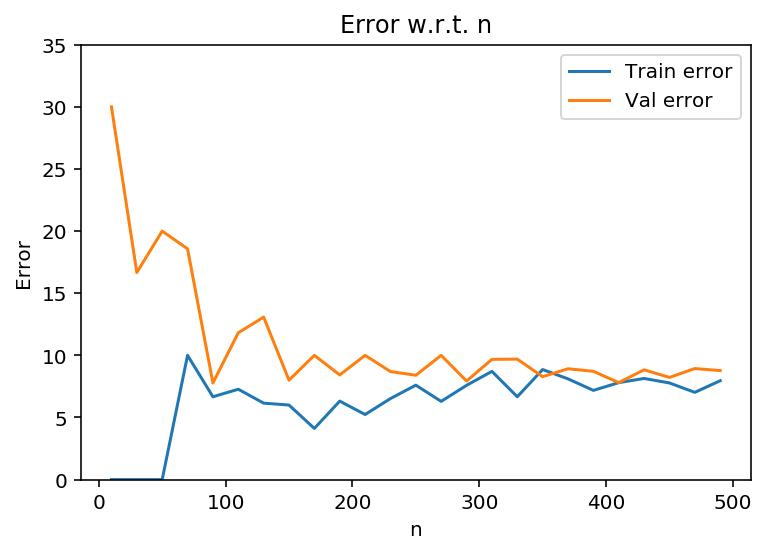

In [11]:
## List of values of n
list_n = list(np.array(range(10,500,20),np.float32))
#print(list_n)

d = 4
poly = PolynomialFeatures(d)

train_error_tab = np.zeros(len(list_n))
val_error_tab = np.zeros(len(list_n))

train_y_original = train_data_original[:,2][:,None] 
val_y_original = val_data_original[:,2][:,None]

for i,n in enumerate(list_n):
    
     # select sub-set of n data 
    idx = np.random.permutation(range(n_original))
    idx = idx[:int(n)]
    train_data = train_data_original[idx,:]
    train_y = train_y_original[idx]
    val_data = val_data_original[idx,:]
    val_y = val_y_original[idx]
    
    train_X = poly.fit_transform(train_data[:,0:2])
    train_w_solution, train_loss_solution = compute_w_solution(train_X,train_y,0)
    train_error = compute_error(train_X,train_w_solution,train_y)
    train_error_tab[i] = train_error
    
    val_X = poly.fit_transform(val_data[:,0:2])
    val_error = compute_error(val_X,train_w_solution,val_y)
    val_error_tab[i] = val_error

    
# plot
x = list_n
plt.figure(1)
plt.plot(x, train_error_tab,label='Train error'.format(i=1))
plt.plot(x, val_error_tab,label='Val error'.format(i=2))
plt.legend(loc='best')
plt.title('Error w.r.t. n')
plt.xlabel('n')
plt.ylabel('Error')
plt.ylim([0,35])
plt.show()
